# Real data analysis (when confounder is not considered)

### Notice

Before you implement below codes, you should confirm that R is installed in your PC.

In [55]:
!pip install packages rpy2 

In [56]:
import uiat # it will takes some time.

In [57]:
import numpy as np
import pandas as pd

# EDA

In [58]:
df=pd.read_csv("forestfires.csv")

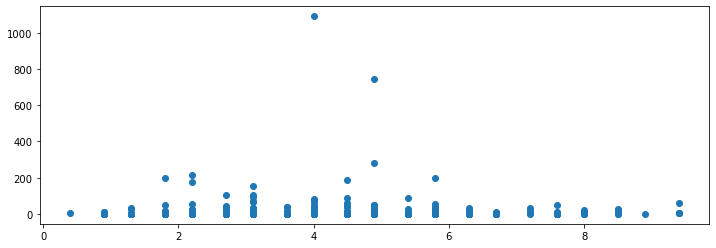

In [59]:
import matplotlib.pyplot as plt

plt.scatter(df['wind'],df['area'])

In [60]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


(array([ 14.,  45.,  97.,  93.,  92., 113.,  19.,  26.,   5.,  13.]),
 array([0.4, 1.3, 2.2, 3.1, 4. , 4.9, 5.8, 6.7, 7.6, 8.5, 9.4]),
 <BarContainer object of 10 artists>)

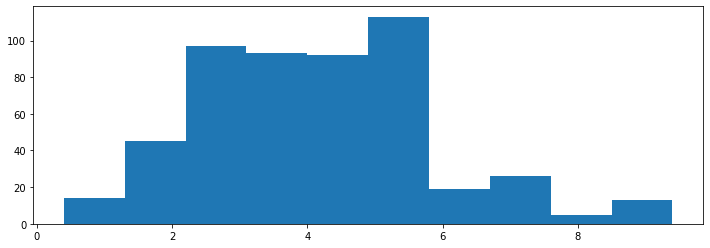

In [61]:
plt.hist(df['wind'])

(array([508.,   6.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   1.]),
 array([   0.   ,  109.084,  218.168,  327.252,  436.336,  545.42 ,
         654.504,  763.588,  872.672,  981.756, 1090.84 ]),
 <BarContainer object of 10 artists>)

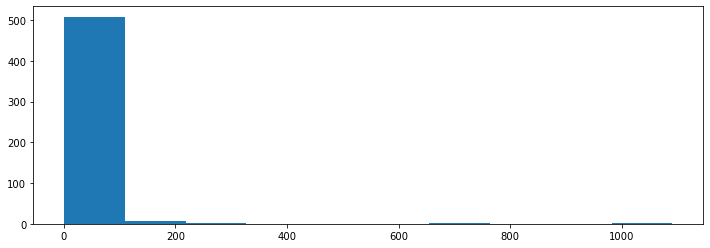

In [62]:
plt.hist(df['area'])

(array([275.,  61.,  59.,  54.,  29.,  21.,   9.,   6.,   1.,   2.]),
 array([0.        , 0.69956196, 1.39912393, 2.09868589, 2.79824785,
        3.49780981, 4.19737178, 4.89693374, 5.5964957 , 6.29605766,
        6.99561963]),
 <BarContainer object of 10 artists>)

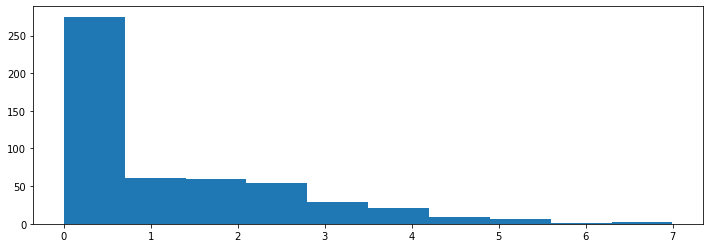

In [63]:
plt.hist(np.log(df['area']+1))

# Ignorability Assumption Test

In [64]:
df.loc[df["month"]=="jan","month"]=1
df.loc[df["month"]=="feb","month"]=2
df.loc[df["month"]=="mar","month"]=3
df.loc[df["month"]=="apr","month"]=4
df.loc[df["month"]=="may","month"]=5
df.loc[df["month"]=="jun","month"]=6
df.loc[df["month"]=="jul","month"]=7
df.loc[df["month"]=="aug","month"]=8
df.loc[df["month"]=="sep","month"]=9
df.loc[df["month"]=="oct","month"]=10
df.loc[df["month"]=="nov","month"]=11
df.loc[df["month"]=="dec","month"]=12

A = np.array(df["wind"])
Y = np.array(df["area"])
Z = np.array(df["month"])
X = np.array(df[["temp","RH","rain"]])


UIAT = uiat.UniversalIgnorabilityAssumptionTest(cause=A,effect=Y,explorer=Z,covariates=X,dtype="continuous",verbose=False)
pvalue = UIAT.test()
print(pvalue) # conclude the violation of ignorability assumption

0.04309550368287507


# Causal Inference using Machine Learning

In [65]:
X,y = np.array(df[["wind","temp","RH","rain"]]), np.array(df["area"])

In [66]:
np.random.seed(1)
train_idx=np.random.choice(517,517,replace=False)

In [67]:
X_train = X[train_idx,]
y_train = y[train_idx,]

In [68]:
#Import libraries:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics   #Additional scklearn functions

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [69]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
# the fine-tuned XGBoost
xgbt_regr = xgb.XGBRegressor(
    learning_rate=0.1,
    n_estimators=24,
    max_depth=2,
    min_child_weight=7,
    gamma=0.6,
    subsample=0.8,
    colsample_bytree=0.75,
    objective='reg:squarederror',
    nthread=3,
    scale_pos_weight=1,
    reg_alpha=10**-6,
    reg_lambda=1,
    seed=1
    )

In [70]:
train=df.iloc[train_idx,]
train.reset_index(drop=True,inplace=True)

train['area']=np.log(train['area']+1)
target = 'area'
predictors = ["wind","temp","RH","rain"]


In [71]:
xgbt_regr.fit(train[predictors],train[target])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.75,
             enable_categorical=False, gamma=0.6, gpu_id=-1,
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=7, missing=nan, monotone_constraints='()',
             n_estimators=24, n_jobs=3, nthread=3, num_parallel_tree=1,
             predictor='auto', random_state=1, reg_alpha=1e-06, reg_lambda=1,
             scale_pos_weight=1, seed=1, subsample=0.8, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [88]:
#Estimating potential outcome functions

import copy

X_1 = copy.deepcopy(X)
X_2 = copy.deepcopy(X)
X_3 = copy.deepcopy(X)
X_4 = copy.deepcopy(X)
X_5 = copy.deepcopy(X)
X_6 = copy.deepcopy(X)
X_7 = copy.deepcopy(X)

X_1[:,0] = 4.017602-3*1.791653 # average wind speed  - 3 * std(wind speed)
X_2[:,0] = 4.017602-2*1.791653 # average wind speed  - 2 * std(wind speed)
X_3[:,0] = 4.017602-1*1.791653 # average wind speed  - 1 * std(wind speed)
X_4[:,0] = 4.017602            # average wind speed 
X_5[:,0] = 4.017602+1*1.791653 # average wind speed  + 1 * std(wind speed)
X_6[:,0] = 4.017602+2*1.791653 # average wind speed  + 2 * std(wind speed)
X_7[:,0] = 4.017602+3*1.791653 # average wind speed  + 3 * std(wind speed)

pred1 = np.exp(xgbt_regr.predict(X_1))-1
pred1[pred1<0,]=0

pred2 = np.exp(xgbt_regr.predict(X_2))-1
pred2[pred2<0,]=0

pred3 = np.exp(xgbt_regr.predict(X_3))-1
pred3[pred3<0,]=0

pred4 = np.exp(xgbt_regr.predict(X_4))-1
pred4[pred4<0,]=0

pred5 = np.exp(xgbt_regr.predict(X_5))-1
pred5[pred5<0,]=0

pred6 = np.exp(xgbt_regr.predict(X_6))-1
pred6[pred6<0,]=0

pred7 = np.exp(xgbt_regr.predict(X_7))-1
pred7[pred7<0,]=0

In [89]:
print(np.mean(pred1))
print(np.var(pred1)/517)
print(np.mean(pred1)-1.96*np.sqrt(np.var(pred1)/517)) #Monte Carlo Confidence Intercal
print(np.mean(pred1)+1.96*np.sqrt(np.var(pred1)/517))

1.6006761
0.00036732915868150425
1.5631110268333783
1.6382410926124225


In [90]:
print(np.mean(pred2))
print(np.var(pred2)/517)
print(np.mean(pred2)-1.96*np.sqrt(np.var(pred2)/517)) #Monte Carlo Confidence Intercal
print(np.mean(pred2)+1.96*np.sqrt(np.var(pred2)/517))

1.6006761
0.00036732915868150425
1.5631110268333783
1.6382410926124225


In [91]:
print(np.mean(pred3))
print(np.var(pred3)/517)
print(np.mean(pred3)-1.96*np.sqrt(np.var(pred3)/517)) #Monte Carlo Confidence Intercal
print(np.mean(pred3)+1.96*np.sqrt(np.var(pred3)/517))

1.7444763
0.00039639189925830184
1.7054535157922772
1.7834991209264728


In [92]:
print(np.mean(pred4))
print(np.var(pred4)/517)
print(np.mean(pred4)-1.96*np.sqrt(np.var(pred4)/517)) #Monte Carlo Confidence Intercal
print(np.mean(pred4)+1.96*np.sqrt(np.var(pred4)/517))

2.0172086
0.0008747237563363819
1.9592401470159653
2.07517700538882


In [93]:
print(np.mean(pred5))
print(np.var(pred5)/517)
print(np.mean(pred5)-1.96*np.sqrt(np.var(pred5)/517)) #Monte Carlo Confidence Intercal
print(np.mean(pred5)+1.96*np.sqrt(np.var(pred5)/517))

1.8823011
0.001167347514191264
1.8153348154817532
1.949267368813901


In [94]:
print(np.mean(pred6))
print(np.var(pred6)/517)
print(np.mean(pred6)-1.96*np.sqrt(np.var(pred6)/517)) #Monte Carlo Confidence Intercal
print(np.mean(pred6)+1.96*np.sqrt(np.var(pred6)/517))

2.2863452
0.0016662602959564622
2.206338334046439
2.36635215286152


In [95]:
print(np.mean(pred7))
print(np.var(pred7)/517)
print(np.mean(pred7)-1.96*np.sqrt(np.var(pred7)/517)) #Monte Carlo Confidence Intercal
print(np.mean(pred7)+1.96*np.sqrt(np.var(pred7)/517))

3.28301
0.0026995206478716556
3.181174459500468
3.3848455524013876
